In [29]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [30]:
# ! wget https://www.dropbox.com/s/m3fhdaallddln0q/mnist_png_224x3.tar.bz2?dl=0 -O mnist_png_224x3.tar.bz2
# ! tar -jxvf mnist_png_224x3.tar.bz2

In [31]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [32]:
EPOCHS=30
BATCH_SIZE=200
IMG_SIZE=(224,224)
IMG_SHAPE = IMG_SIZE + (3,)

In [33]:
train_dir = 'mnist_png_224x3/training'
test_dir = 'mnist_png_224x3/testing'

# train_dir = '/home/a/datasets/mnist_png_224x3/training'
# test_dir = '/home/a/datasets/mnist_png_224x3/testing'

In [34]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = tf.keras.layers.Conv2D(32, (3,3))(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3,3))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2,2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10)(x)
x = tf.keras.layers.Activation('softmax')(x)

In [35]:
model = tf.keras.Model(inputs, x)

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 220, 220, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      1849

In [38]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [39]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=15,
                               width_shift_range=0.2,
                               height_shift_range=0.1,
                               zoom_range=0.1)

In [40]:
training_set = train_gen.flow_from_directory(train_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             color_mode='rgb')

test_set = train_gen.flow_from_directory(test_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         color_mode='rgb')

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [41]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', # better than val_acc
                                               patience=3, 
                                               mode='auto', # default
                                               verbose=1)

In [42]:
history = model.fit(training_set,
                    validation_data=test_set,
                    epochs=EPOCHS,
                    callbacks=[es_callback])

Epoch 1/30
300/300 [==============================] - 704s 2s/step - loss: 0.4884 - accuracy: 0.8485 - val_loss: 0.1646 - val_accuracy: 0.9480
Epoch 2/30
300/300 [==============================] - 694s 2s/step - loss: 0.1667 - accuracy: 0.9483 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 3/30
300/300 [==============================] - 693s 2s/step - loss: 0.1241 - accuracy: 0.9618 - val_loss: 0.0901 - val_accuracy: 0.9711
Epoch 4/30
300/300 [==============================] - 693s 2s/step - loss: 0.1029 - accuracy: 0.9682 - val_loss: 0.0607 - val_accuracy: 0.9812
Epoch 5/30
300/300 [==============================] - 692s 2s/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.0686 - val_accuracy: 0.9791
Epoch 6/30
300/300 [==============================] - 689s 2s/step - loss: 0.0861 - accuracy: 0.9725 - val_loss: 0.0526 - val_accuracy: 0.9824
Epoch 7/30
300/300 [==============================] - 690s 2s/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.0545 - val_accuracy: 0.9837

In [43]:
plt.plot(history.history['accuracy'],
         label='accuracy')
plt.plot(history.history['val_accuracy'],
         label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('correct responses %')
plt.legend()
plt.show()

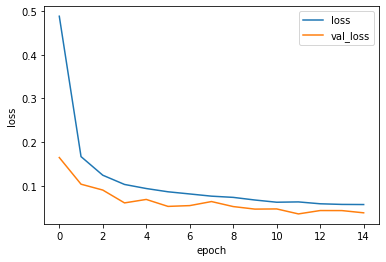

In [44]:
plt.plot(history.history['loss'],
         label='loss')
plt.plot(history.history['val_loss'],
         label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
model.save('es_func_folder_224x3_c.h5')

In [46]:
! cp es_func_folder_224x3_c.h5 /content/gdrive/My\ Drive/